# <font color="Orange">Hotel Recommendation System Based on Ratings</font>

## <font color="blue">Importing libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color="blue">Importing the Datasets</font>

In [2]:
df_hd=pd.read_csv("./datasets/Hotel_details.csv")
df_hra=pd.read_csv("./datasets/Hotel_Room_attributes.csv")
df_hd.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [3]:
df_hra.head()

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"


## <font color="blue">Data Analysis</font>

In [4]:
# hotel details dataset
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [5]:
df_hd.shape

(108048, 14)

In [6]:
df_hd.isnull().sum()

id                  0
hotelid             0
hotelname           0
address          5093
city                0
country             0
zipcode         24562
propertytype        0
starrating          0
latitude            0
longitude           0
Source              0
url               111
curr                0
dtype: int64

In [7]:
df_hd['hotelid'].duplicated().sum()

1855

In [8]:
df_hd.shape

(108048, 14)

In [9]:
# hotel room price dataset
df_hra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               165873 non-null  int64 
 1   hotelcode        165873 non-null  int64 
 2   roomamenities    161054 non-null  object
 3   roomtype         165873 non-null  object
 4   ratedescription  161054 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.3+ MB


In [10]:
df_hra.shape

(165873, 5)

In [11]:
df_hra.isnull().sum()

id                    0
hotelcode             0
roomamenities      4819
roomtype              0
ratedescription    4819
dtype: int64

### <font color="blue">Data Column selection</font>

In [12]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [13]:
hotel_details=df_hd.iloc[:,[1,2,3,4,5,8]]
hotel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   hotelid     108048 non-null  int64 
 1   hotelname   108048 non-null  object
 2   address     102955 non-null  object
 3   city        108048 non-null  object
 4   country     108048 non-null  object
 5   starrating  108048 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


In [14]:
df_hra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               165873 non-null  int64 
 1   hotelcode        165873 non-null  int64 
 2   roomamenities    161054 non-null  object
 3   roomtype         165873 non-null  object
 4   ratedescription  161054 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.3+ MB


In [15]:
room_attributes=df_hra.iloc[:,0:5]
room_attributes.head()

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"


## <font color="blue">Data Cleaning</font>

In [16]:
hotel_details.isnull().sum()

hotelid          0
hotelname        0
address       5093
city             0
country          0
starrating       0
dtype: int64

In [17]:
hotel_details_updated=hotel_details.dropna()

In [18]:
hotel_details_updated.isnull().sum()

hotelid       0
hotelname     0
address       0
city          0
country       0
starrating    0
dtype: int64

In [19]:
hotel_details_updated.shape

(102955, 6)

In [20]:
hotel_details_updated["hotelid"].duplicated().sum()

1852

In [21]:
hotel_details_updated=hotel_details_updated.drop_duplicates(subset=["hotelid"])
hotel_details_updated.shape

(101103, 6)

In [22]:
room_attributes.isnull().sum()

id                    0
hotelcode             0
roomamenities      4819
roomtype              0
ratedescription    4819
dtype: int64

In [23]:
room_attributes.shape

(165873, 5)

In [24]:
room_attributes["hotelcode"].duplicated().sum()

156776

In [25]:
room_attributes=room_attributes.drop_duplicates(subset=["hotelcode"])
room_attributes.shape

(9097, 5)

## <font color="blue">Merging the two required datasets<font>

### <font color="blue">Renaming the column name for merging</font>

In [26]:
room_attributes_updated=room_attributes.rename(columns={"hotelcode":"hotelid"})
room_attributes_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9097 entries, 0 to 165815
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               9097 non-null   int64 
 1   hotelid          9097 non-null   int64 
 2   roomamenities    8904 non-null   object
 3   roomtype         9097 non-null   object
 4   ratedescription  8904 non-null   object
dtypes: int64(2), object(3)
memory usage: 426.4+ KB


### <font color="blue">Merging the dataframes</font>

In [27]:
hotel_data=room_attributes_updated.merge(hotel_details_updated,on="hotelid")
hotel_data.shape

(8669, 10)

In [28]:
hotel_data.head()

,id,hotelid,roomamenities,roomtype,ratedescription,hotelname,address,city,country,starrating
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,4
1,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,2
2,50678356,59961,Air conditioning: ;Closet: ;Daily housekeeping...,Single Room,"Room size: 18 m²/194 ft², City view, Shower an...",Hotel Rivoli,Albert-Rosshaupter-Str. 18,Munich,Germany,3
3,50688956,6825,Air conditioning: ;Alarm clock: ;Bathrobes: ;C...,Comfort Single Room,"Room size: 14 m²/151 ft², City view, Non-smoki...",Timhotel Tour Eiffel,11 rue Juge,Paris,France,3
4,50696476,1198059,Air conditioning: ;Closet: ;Coffee/tea maker: ...,"Deluxe, Guest room, 1 Double","Room size: 25 m²/269 ft², City view, 2 single ...",AC Hotel Manchester Salford Quays,"17-19 Trafford Road, Salford Quays",Manchester,United Kingdom,4


## <font color="blue">Data Visualization</font>

<AxesSubplot: title={'center': 'Type of Ratings'}, ylabel='starrating'>

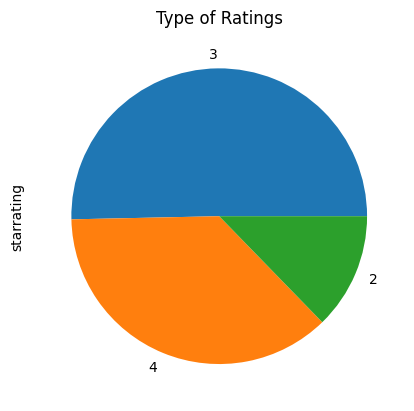

In [29]:
plt.title("Type of Ratings")
hotel_data["starrating"].value_counts().plot(kind="pie")

Text(0, 0.5, 'No. of hotels')

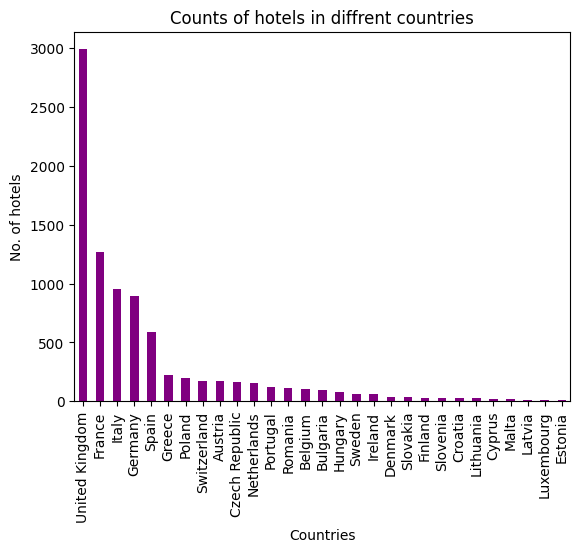

In [30]:
plt.title("Counts of hotels in diffrent countries")
hotel_data["country"].value_counts().plot(kind='bar',color="purple")
plt.xlabel("Countries")
plt.ylabel("No. of hotels")

In [31]:
hotel_data.groupby("country",as_index=False)["city"].count()

,country,city
0,Austria,169
1,Belgium,107
2,Bulgaria,94
3,Croatia,26
4,Cyprus,23
5,Czech Republic,165
6,Denmark,39
7,Estonia,8
8,Finland,31
9,France,1270


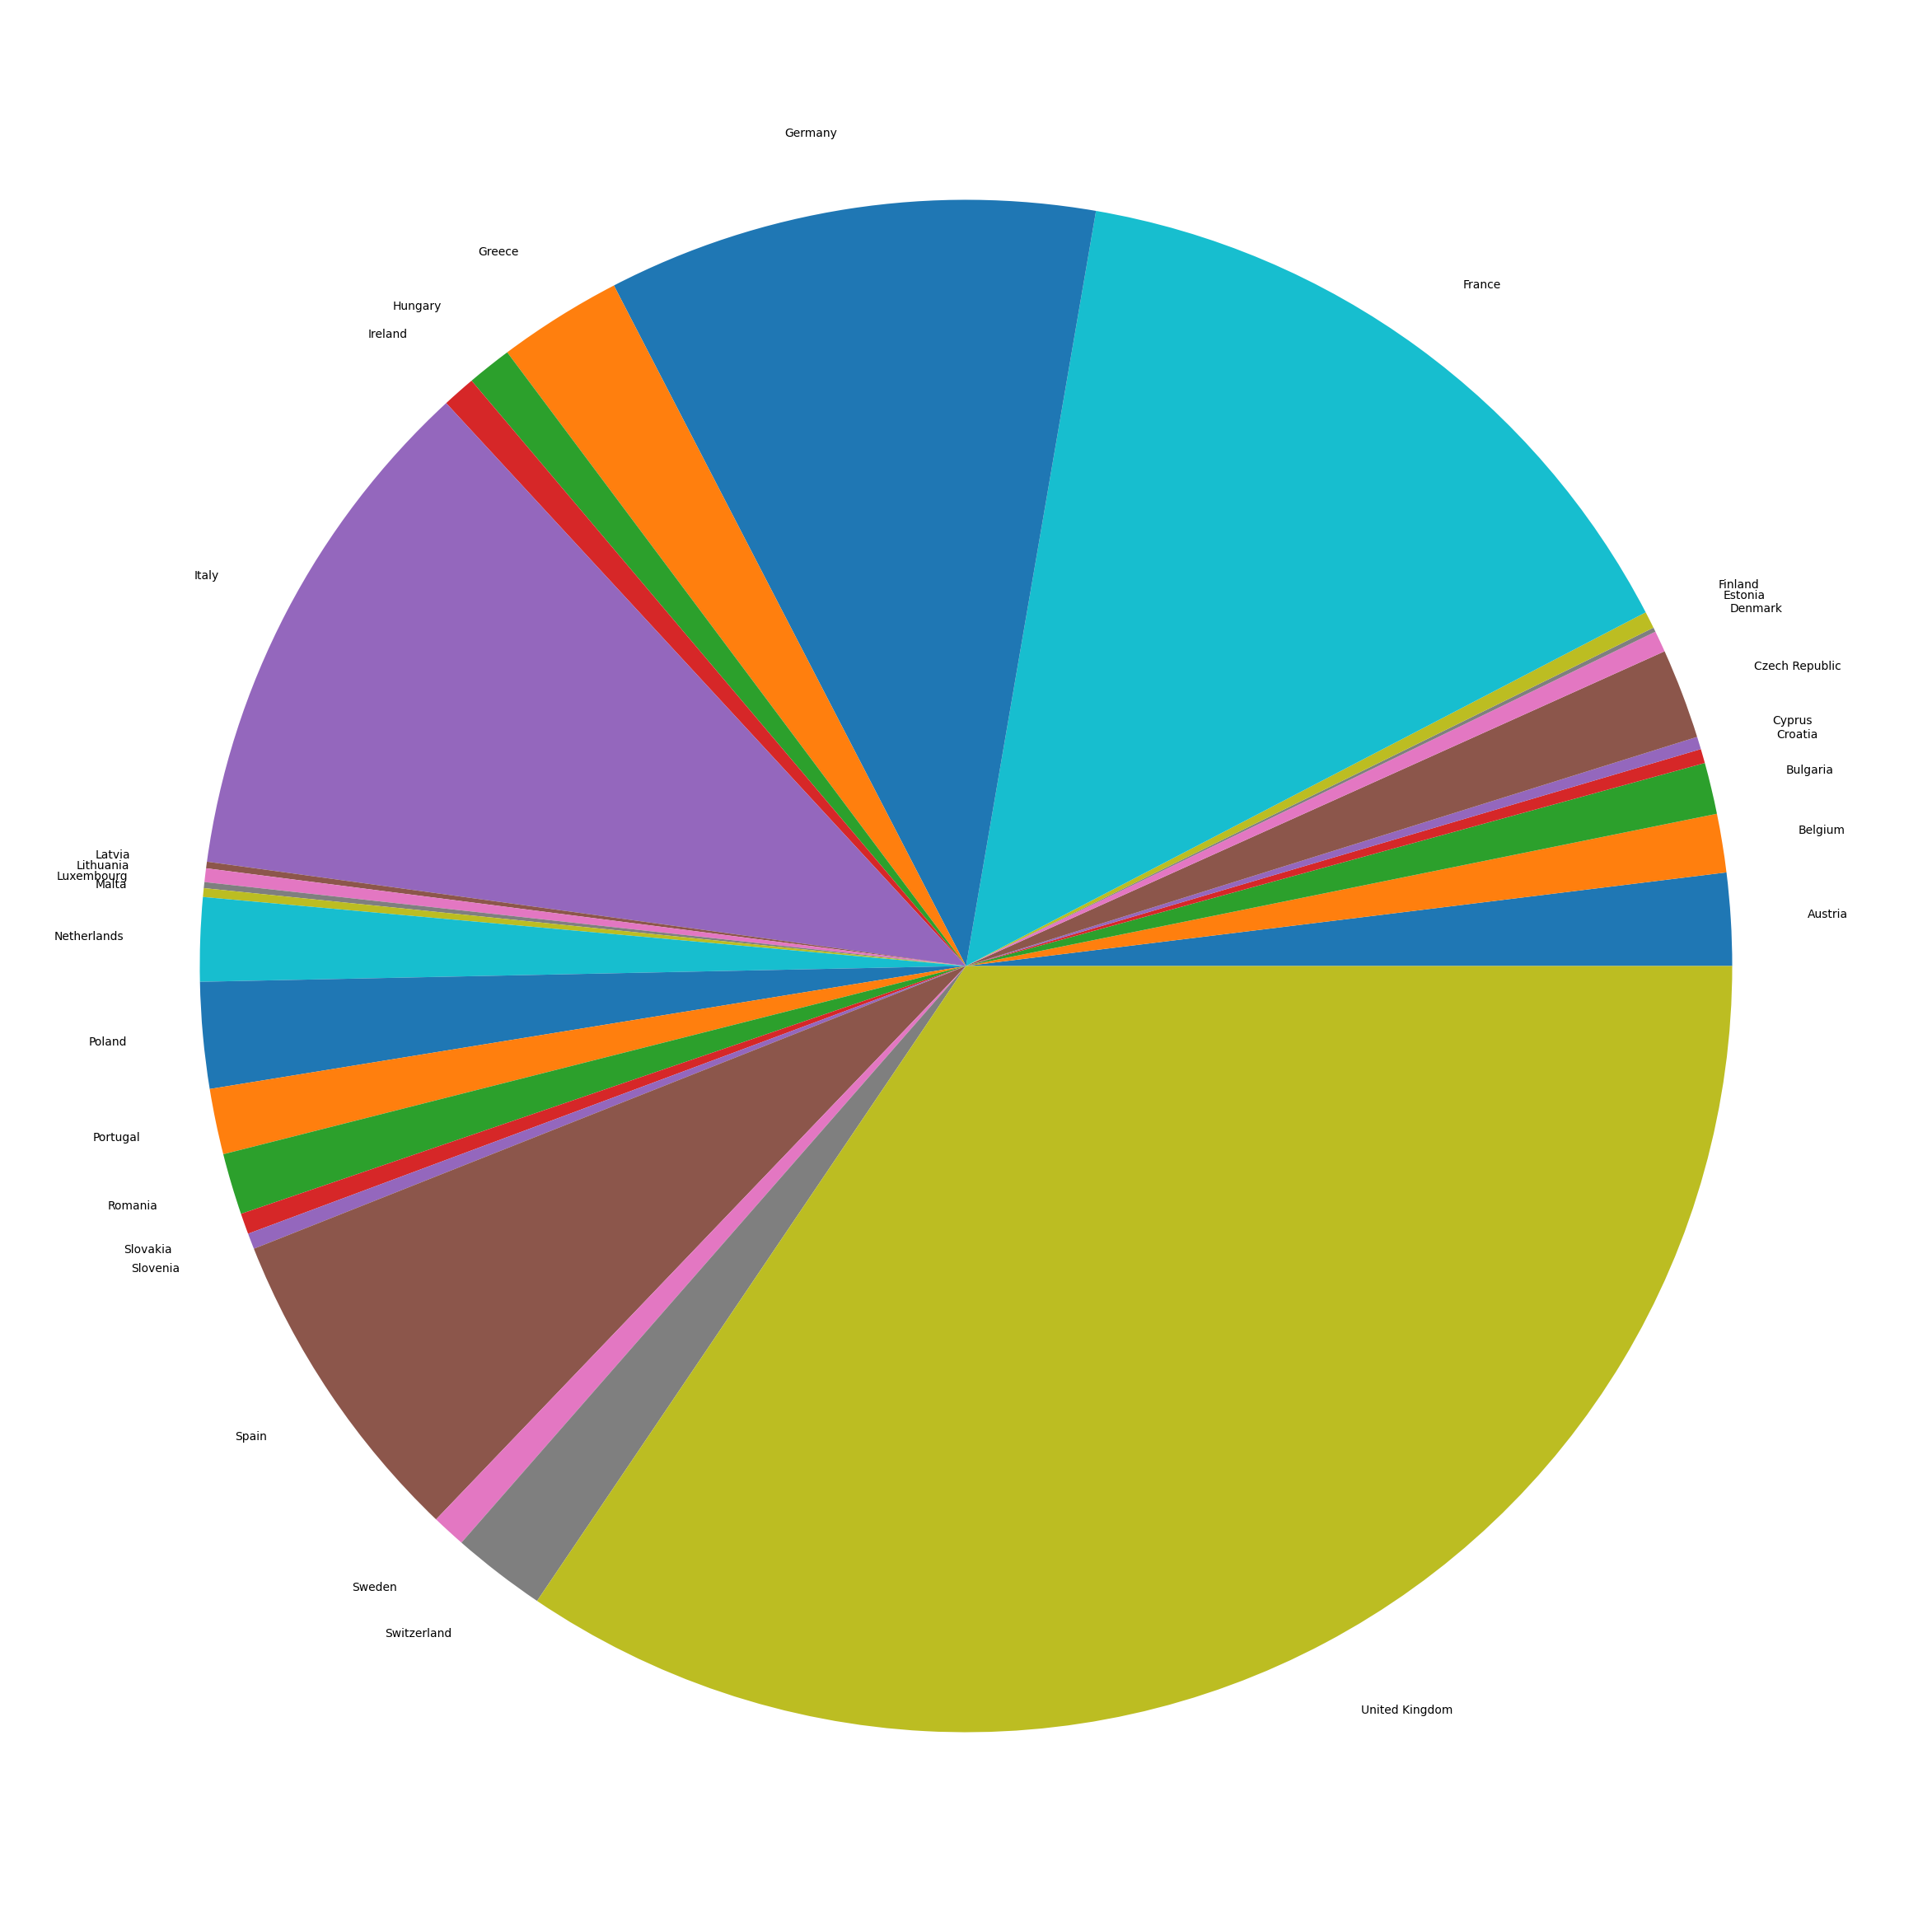

In [32]:
count_data=hotel_data.groupby("country",as_index=False)["city"].count()
fig = plt.figure(figsize =(30, 50))
plt.pie(count_data["city"],labels=count_data["country"])
plt.show()

## <font color="blue">Recommendation based on city and ratings</font>

In [35]:
hotel_data.info()
# hotel_data.to_csv('hotel_data.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8669 entries, 0 to 8668
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               8669 non-null   int64 
 1   hotelid          8669 non-null   int64 
 2   roomamenities    8476 non-null   object
 3   roomtype         8669 non-null   object
 4   ratedescription  8476 non-null   object
 5   hotelname        8669 non-null   object
 6   address          8669 non-null   object
 7   city             8669 non-null   object
 8   country          8669 non-null   object
 9   starrating       8669 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 745.0+ KB


In [34]:
def based_on_city(city,count=5):
    hotel_data['city']=hotel_data['city'].str.lower()
    hotel_data.head()
    matched_city=hotel_data[hotel_data['city']==city.lower()]
    matched_city=matched_city.sort_values(by='starrating',ascending=False)
    if matched_city.empty==False:
        return matched_city.iloc[:,[5,3,2,6,7,8,4,9]].head(count)
    else:
        print("No Hotel Found!")

In [40]:
based_on_city("bristol",20)

,hotelname,roomtype,roomamenities,address,city,country,ratedescription,starrating
2468,Hampton By Hilton Bristol Airport,Queen Room Non-Smoking,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,North Side Road Bristol International Airport,bristol,United Kingdom,"Room size: 25 m²/269 ft², Non-smoking, Shower,...",4
3659,Mercure Brigstow Bristol Hotel,Classic Queen Room,Air conditioning: ;Blackout curtains: ;Closet:...,Welsh Back 5-7,bristol,United Kingdom,"Room size: 20 m²/215 ft², City view, Non-smoki...",4
4564,Radisson Blu Hotel Bristol,Standard,Air conditioning: ;Carpeting: ;Closet: ;Coffee...,Broad Quay,bristol,United Kingdom,"Room size: 28 m²/301 ft², Non-smoking, Shower ...",4
5996,The Regency Bristol Hotel,Single Room with Shared Bathroom,Air conditioning: ;Blackout curtains: ;Coffee/...,40-44 St Pauls Road,bristol,United Kingdom,"Non-smoking, Shower, Shared bathroom, 1 single...",4
6268,The Langford Inn,Double Room with Shower,Air conditioning: ;Closet: ;Clothes rack: ;Cof...,Lower Langford,bristol,United Kingdom,"Shower, 1 double bed",4
6415,Doubletree By Hilton Bristol South Cadbury House,King Bed Guestroom,Air conditioning: ;Alarm clock: ;Blackout curt...,"Cadbury House, Frost Hill, Congresb",bristol,United Kingdom,"Room size: 23 m²/248 ft², Non-smoking, Shower,...",4
6646,Holiday Inn Bristol City Centre,King Bed Superior With Single Sofabed Non-Smoking,NaN,Bond Street,bristol,United Kingdom,NaN,4
8360,DoubleTree by Hilton Hotel Bristol City Centre,Twin Guest Room,Additional toilet: ;Air conditioning: ;Alarm c...,Redcliffe Way,bristol,United Kingdom,"Room size: 18 m²/194 ft², Street view, Non-smo...",4
2309,Holiday Inn Bristol Airport,Standard,Air conditioning: ;Carpeting: ;Closet: ;Clothe...,A38 Bridgewater Rd Cowslip Grn,bristol,United Kingdom,"Garden view, Non-smoking, Shower and bathtub, ...",3
3637,Best Western Henbury Lodge Hotel,Standard Double Room,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Station Road,bristol,United Kingdom,"Shower, 1 double bed",3


In [36]:
based_on_city("london")

,hotelname,roomtype,roomamenities,address,city,country,ratedescription,starrating
7183,Hilton London Wembley,Queen Accessible Guest Room,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Lakeside Way,london,United Kingdom,"Room size: 26 m²/280 ft², Non-smoking, Shower,...",4
2500,Courtyard Luton Airport,"Standard King, Guest room, 1 King",Additional toilet: ;Air conditioning: ;Alarm c...,Airport Way,london,United Kingdom,"Shower, 1 king bed",4
3129,South Point Suites - London Bridge,Studio Suite,Air conditioning: ;Alarm clock: ;Blackout curt...,Bermondsey Street,london,United Kingdom,"Room size: 24 m²/258 ft², Street view, Non-smo...",4
3147,Holiday Inn Express London - Epsom Downs,Standard Twin Or Double Room Non-Smoking,Air conditioning: ;Carpeting: ;Closet: ;Clothe...,Langley Vale Road,london,United Kingdom,"Room size: 25 m²/269 ft², Non-smoking, Shower,...",4
6957,The Cleveland Hotel,Studio (1 Pers),Air conditioning: ;Free Wi-Fi in all rooms!: ;...,39-40 Cleveland Square,london,United Kingdom,"Free Wi-Fi, Extra low price! (non-refundable)",4
